<a href="https://colab.research.google.com/github/Abhy611/Random-Forest-Classifier/blob/main/ABHY_PRN_31_Random_Forest_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Random Forest Classifier


>
=>> **Using the Stroke prediction data**


---



> 1.) Apply EDA for the dataset

> 2.) Use a combination of datasets for training
and testing as 60-40  and 70-30.

> 3.) Trying three combinations of the number of estimators and the number of jobs.


> 4.) Evaluate the performance of the model in
terms of accuracy, mean square error, root mean square error and mean absolute
error



> 6 Show the plots for


i) variation in performance accuracy with
different combinations of training and testing datasets


ii) variation in performance  of mean square error, root mean square error,
and mean absolute error  with different
combinations of training and testing datasets


iii) variation in performance of mean square
error, root mean square error, and mean absolute error with different
combinations of a number of estimators and the number of jobs.












In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/full_data (1).csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
df.isnull().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for i in df.columns:
  if df[i].dtype == 'object':
    df[i]=enc.fit_transform(df[i])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int64  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int64  
 5   work_type          4981 non-null   int64  
 6   Residence_type     4981 non-null   int64  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   int64  
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 428.2 KB


#Distribution of Stroke (Target Variable)

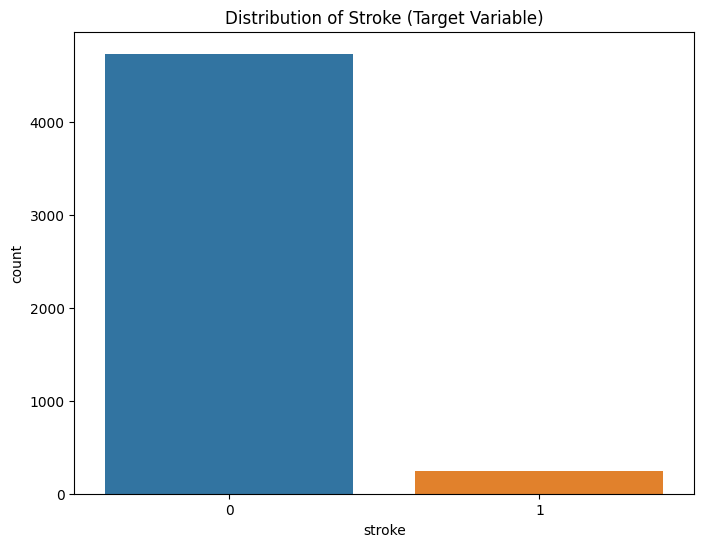

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='stroke', data=df)
plt.title('Distribution of Stroke (Target Variable)')
plt.show()

#Correlation Heatmap

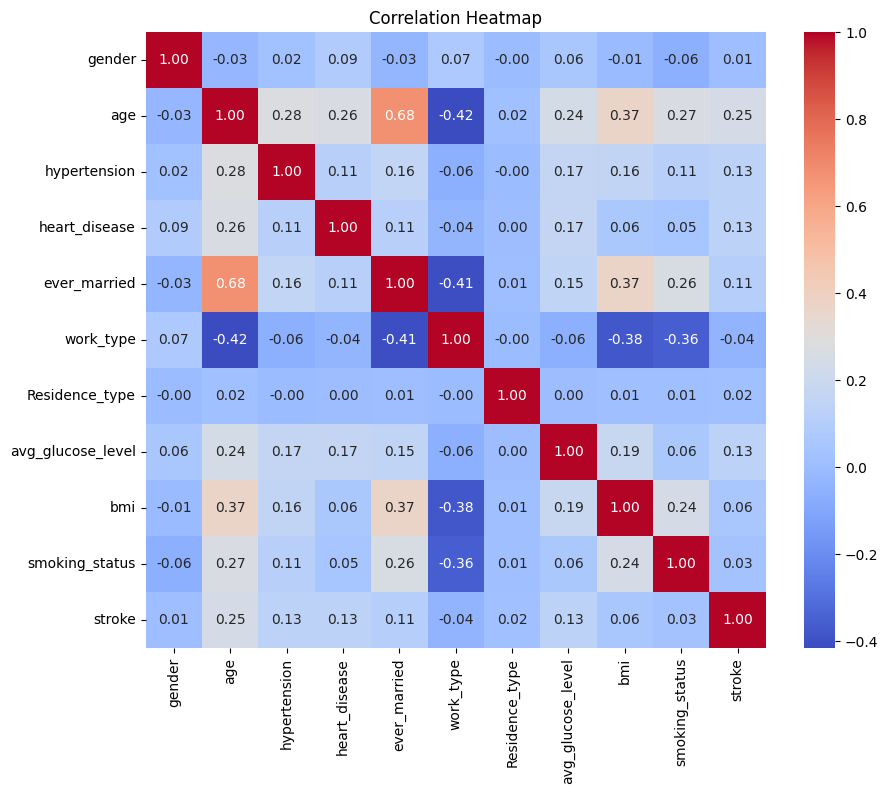

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#Age Distribution graph

Text(0.5, 1.0, 'Age Distribution')

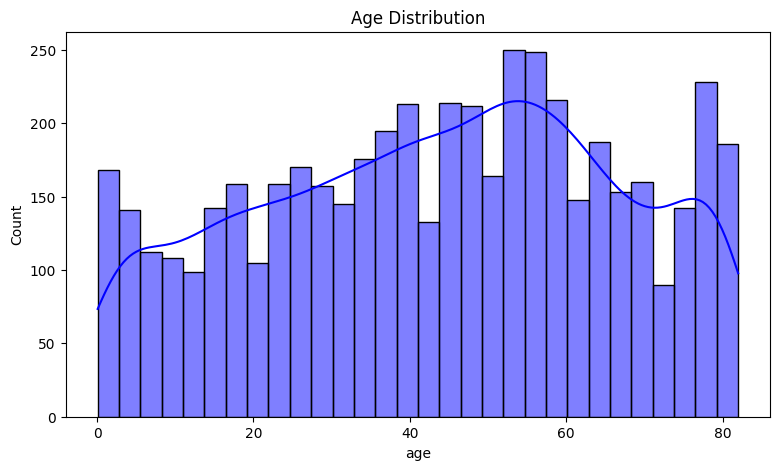

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['age'], kde=True, bins=30, color='blue')
plt.title('Age Distribution')

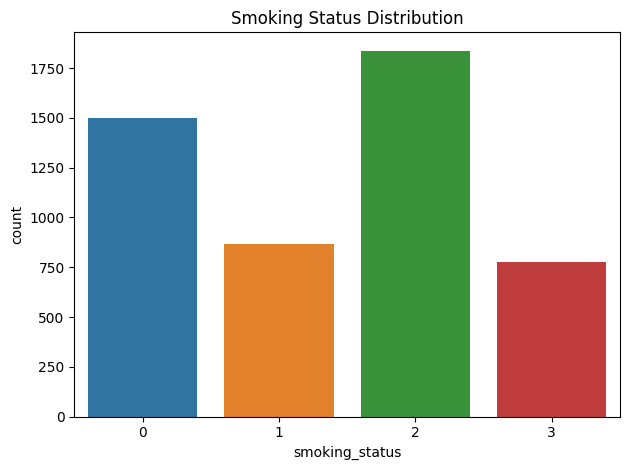

In [ ]:
plt.subplot(1, 1, 1)
sns.countplot(x='smoking_status', data=df)
plt.title('Smoking Status Distribution')

plt.tight_layout()
plt.show()

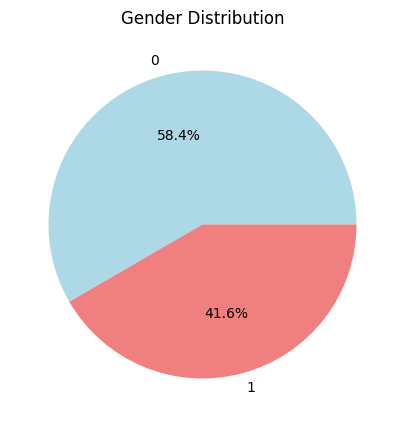

In [ ]:
plt.figure(figsize=(15, 5))

gender_counts = df['gender'].value_counts()
colors = ['lightblue', 'lightcoral', 'lightgreen']

plt.subplot(1, 2, 1)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Gender Distribution')

plt.show()

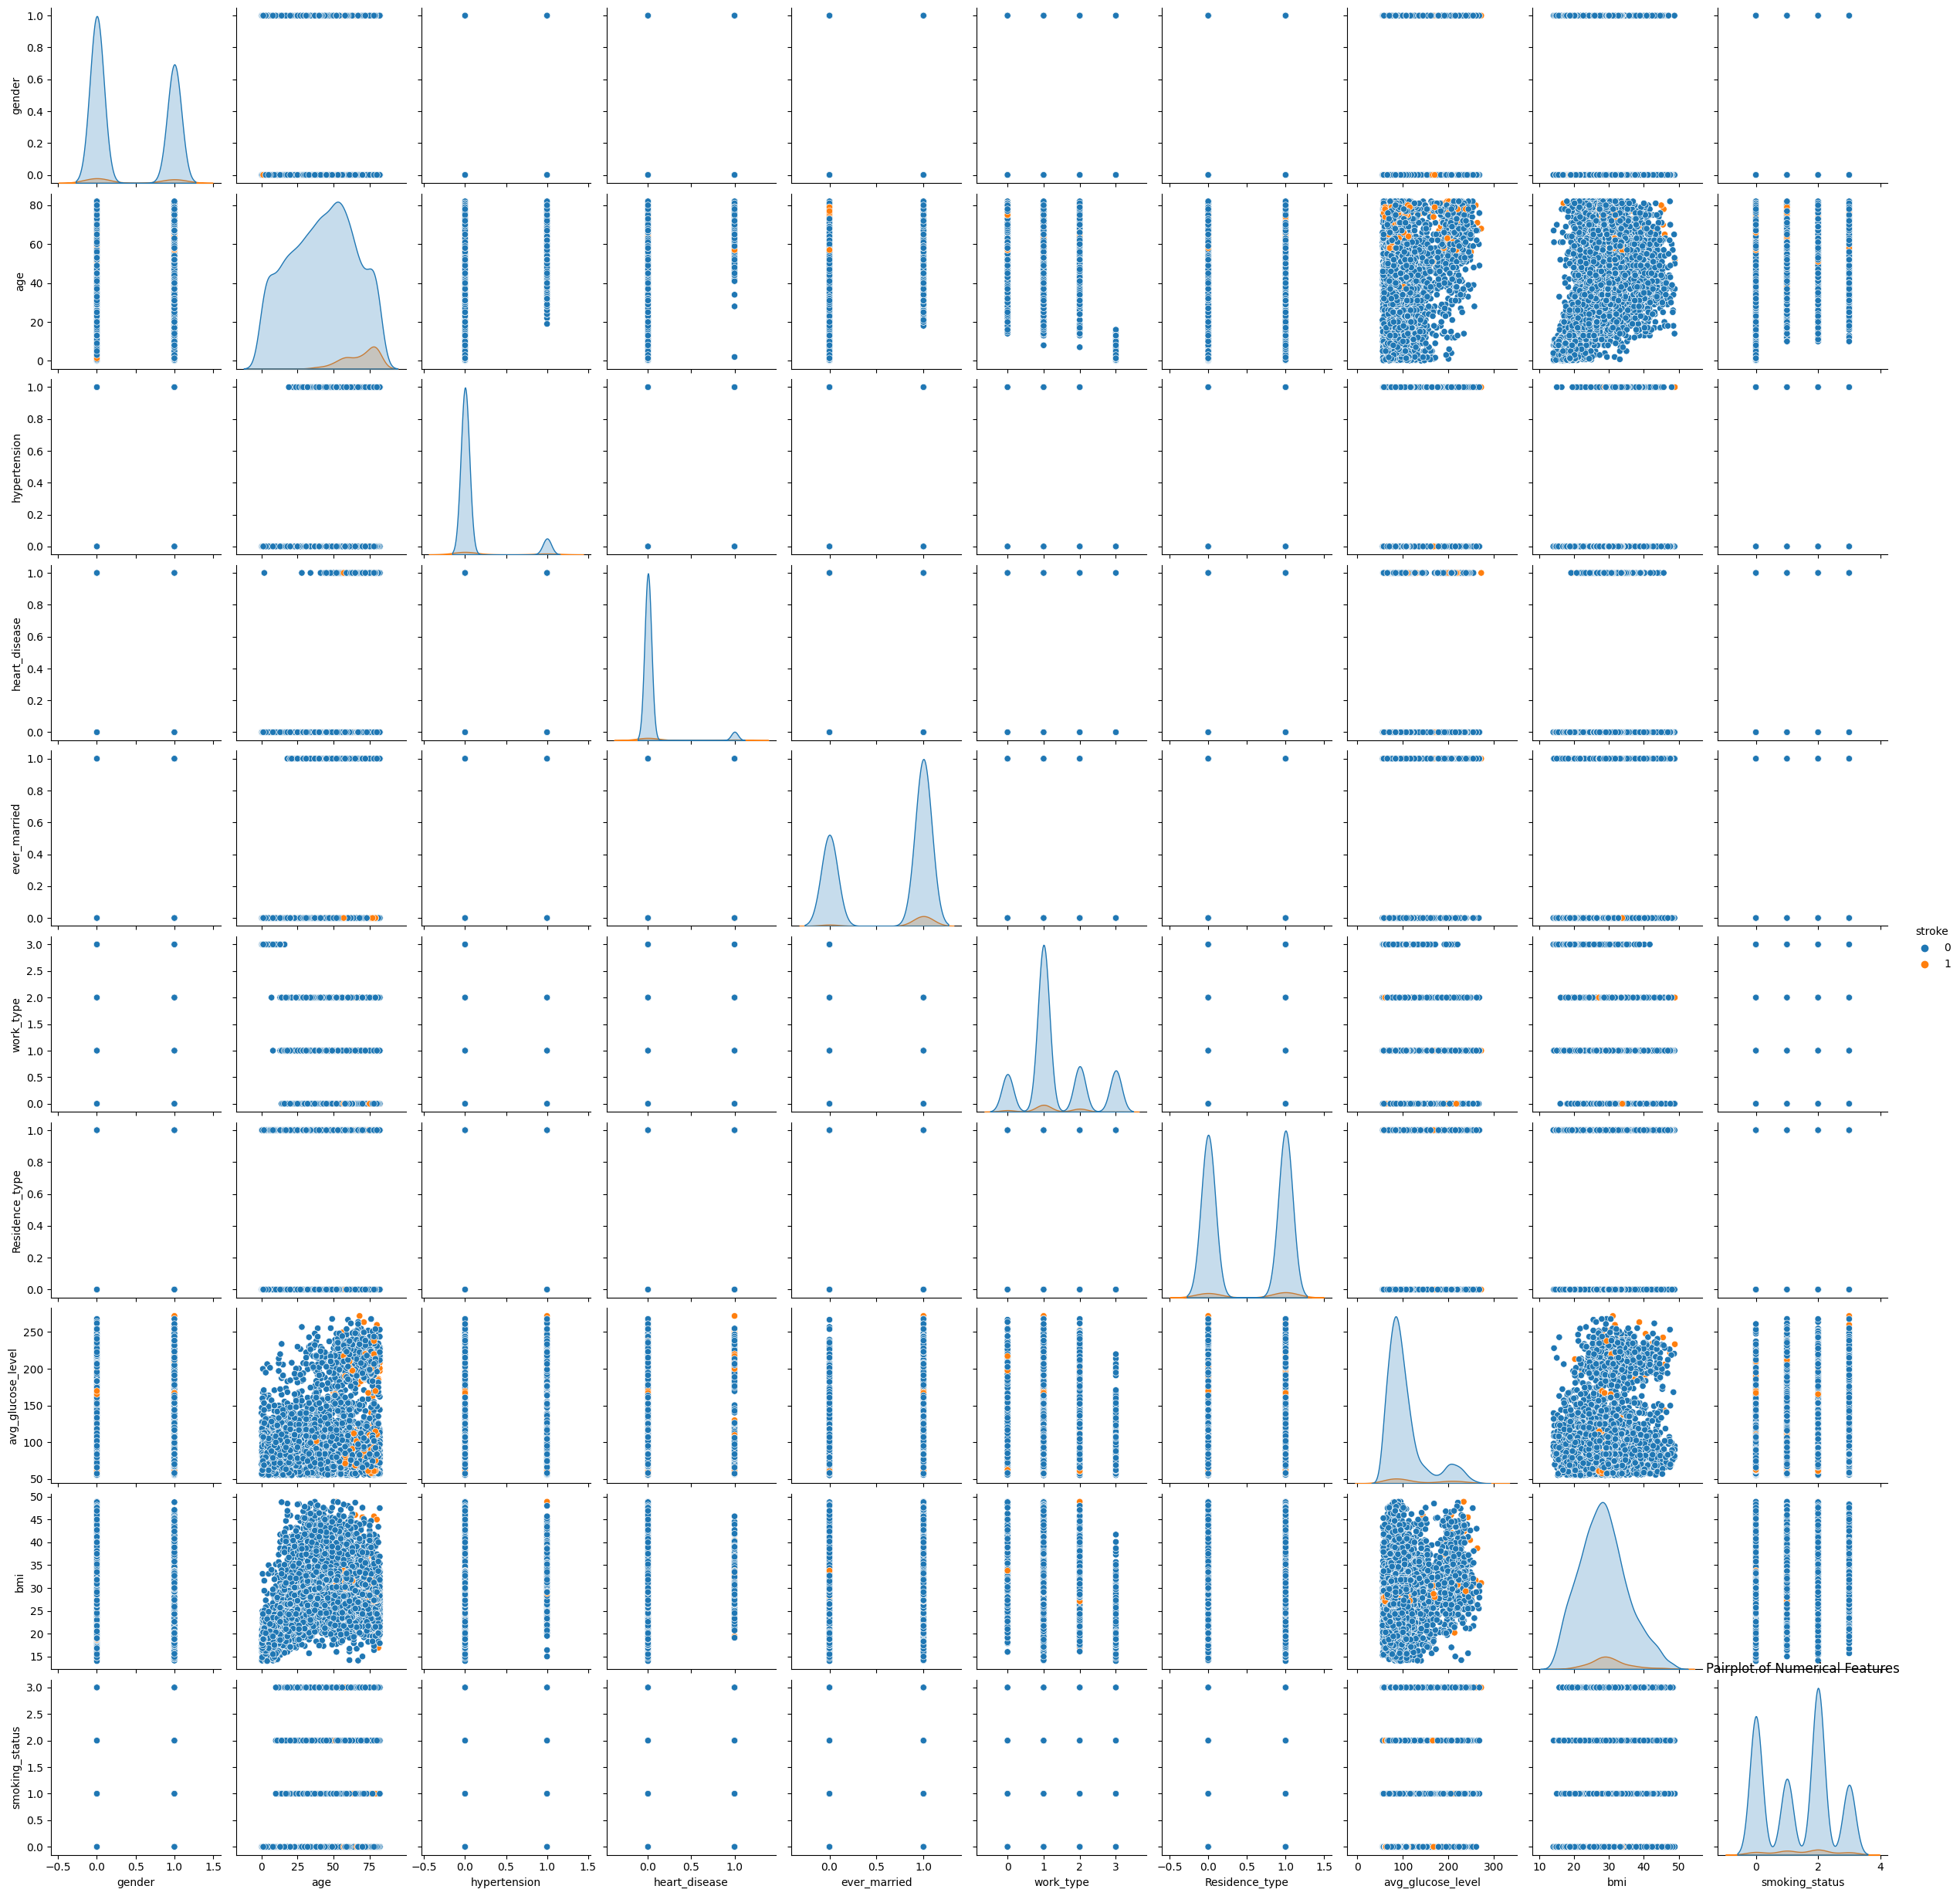

In [ ]:
sns.pairplot(df, hue='stroke')
plt.title('Pairplot of Numerical Features')
plt.show()


In [ ]:
y=df['stroke']
X=df.drop(['stroke'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_60, X_test_60, y_train_60, y_test_60 = train_test_split(X, y, test_size=0.4, random_state=42)
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
estimators = [500, 100, 250]
jobs = [1, 10, 15]

results_60 = []

for n_estimators in estimators:
    for n_jobs in jobs:
        model = RandomForestClassifier(n_estimators=n_estimators, n_jobs=n_jobs)
        model.fit(X_train_60, y_train_60)
        y_pred = model.predict(X_test_60)

        accuracy = accuracy_score(y_test_60, y_pred)
        mse = mean_squared_error(y_test_60, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test_60, y_pred)

        results_60.append((n_estimators, n_jobs, accuracy, mse, rmse, mae))

In [ ]:
print("Evaluation for 60-40 data split model: ")
for result in results_60:
    n_estimators, n_jobs, accuracy, mse, rmse, mae = result
    print(f"Estimators: {n_estimators}, Jobs: {n_jobs}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")

Evaluation for 60-40 data split model: 
Estimators: 500, Jobs: 1
Accuracy: 0.95
MSE: 0.05
RMSE: 0.23
MAE: 0.05
Estimators: 500, Jobs: 10
Accuracy: 0.95
MSE: 0.05
RMSE: 0.23
MAE: 0.05
Estimators: 500, Jobs: 15
Accuracy: 0.95
MSE: 0.05
RMSE: 0.23
MAE: 0.05
Estimators: 100, Jobs: 1
Accuracy: 0.95
MSE: 0.05
RMSE: 0.23
MAE: 0.05
Estimators: 100, Jobs: 10
Accuracy: 0.95
MSE: 0.05
RMSE: 0.23
MAE: 0.05
Estimators: 100, Jobs: 15
Accuracy: 0.95
MSE: 0.05
RMSE: 0.23
MAE: 0.05
Estimators: 250, Jobs: 1
Accuracy: 0.95
MSE: 0.05
RMSE: 0.23
MAE: 0.05
Estimators: 250, Jobs: 10
Accuracy: 0.95
MSE: 0.05
RMSE: 0.23
MAE: 0.05
Estimators: 250, Jobs: 15
Accuracy: 0.95
MSE: 0.05
RMSE: 0.23
MAE: 0.05


In [ ]:
estimators = [500, 100, 250]
jobs = [1, 10, 15]

results_70 = []

for n_estimators in estimators:
    for n_jobs in jobs:
        model = RandomForestClassifier(n_estimators=n_estimators, n_jobs=n_jobs)
        model.fit(X_train_70, y_train_70)
        y_pred = model.predict(X_test_70)

        accuracy = accuracy_score(y_test_70, y_pred)
        mse = mean_squared_error(y_test_70, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test_70, y_pred)

        results_70.append((n_estimators, n_jobs, accuracy, mse, rmse, mae))

In [ ]:
print("Evaluation for 70-30 data split model: ")

for result in results_70:
    n_estimators, n_jobs, accuracy, mse, rmse, mae = result
    print(f"Estimators: {n_estimators}, Jobs: {n_jobs}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")

Evaluation for 70-30 data split model: 
Estimators: 500, Jobs: 1
Accuracy: 0.95
MSE: 0.05
RMSE: 0.23
MAE: 0.05
Estimators: 500, Jobs: 10
Accuracy: 0.95
MSE: 0.05
RMSE: 0.23
MAE: 0.05
Estimators: 500, Jobs: 15
Accuracy: 0.95
MSE: 0.05
RMSE: 0.23
MAE: 0.05
Estimators: 100, Jobs: 1
Accuracy: 0.95
MSE: 0.05
RMSE: 0.23
MAE: 0.05
Estimators: 100, Jobs: 10
Accuracy: 0.95
MSE: 0.05
RMSE: 0.23
MAE: 0.05
Estimators: 100, Jobs: 15
Accuracy: 0.95
MSE: 0.05
RMSE: 0.23
MAE: 0.05
Estimators: 250, Jobs: 1
Accuracy: 0.95
MSE: 0.05
RMSE: 0.23
MAE: 0.05
Estimators: 250, Jobs: 10
Accuracy: 0.95
MSE: 0.05
RMSE: 0.23
MAE: 0.05
Estimators: 250, Jobs: 15
Accuracy: 0.95
MSE: 0.05
RMSE: 0.23
MAE: 0.05


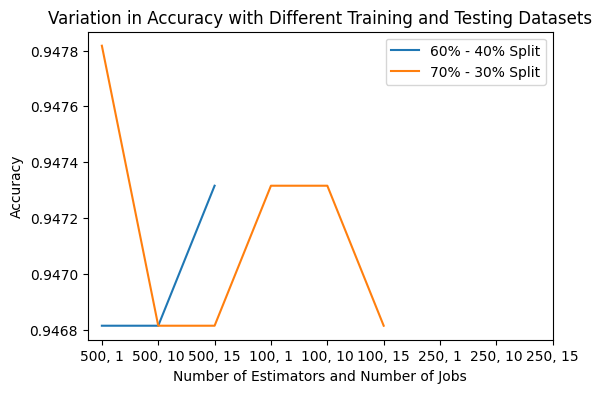

In [ ]:
# Create lists to store accuracy values for different splits
accuracies_60 = []
accuracies_70 = []

# Train the model for each split and record accuracy
for n_estimators, n_jobs, accuracy, mse, rmse, mae in results_60:
    if n_jobs == 1:
        accuracies_60.append(accuracy)
    else:
        accuracies_70.append(accuracy)

# Plot the accuracy results
plt.figure(figsize=(6, 4))
plt.plot(accuracies_60, label='60% - 40% Split')
plt.plot(accuracies_70, label='70% - 30% Split')
plt.xticks(range(9), [f"{n_estimators}, {n_jobs}" for n_estimators, n_jobs, _, _, _, _ in results_60])
plt.xlabel('Number of Estimators and Number of Jobs')
plt.ylabel('Accuracy')
plt.title('Variation in Accuracy with Different Training and Testing Datasets')
plt.legend()
plt.show()


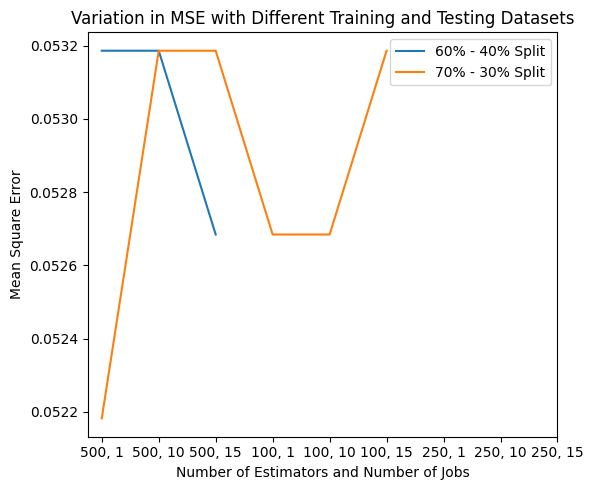

In [ ]:
# Create lists to store error values for different splits
mses_60 = []
rmses_60 = []
maes_60 = []
mses_70 = []
rmses_70 = []
maes_70 = []

# Record error values for each split
for n_estimators, n_jobs, accuracy, mse, rmse, mae in results_60:
    if n_jobs == 1:
        mses_60.append(mse)
        rmses_60.append(rmse)
        maes_60.append(mae)
    else:
        mses_70.append(mse)
        rmses_70.append(rmse)
        maes_70.append(mae)

# Plot the error results
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
plt.plot(mses_60, label='60% - 40% Split')
plt.plot(mses_70, label='70% - 30% Split')
plt.xticks(range(9), [f"{n_estimators}, {n_jobs}" for n_estimators, n_jobs, _, _, _, _ in results_60])
plt.xlabel('Number of Estimators and Number of Jobs')
plt.ylabel('Mean Square Error')
plt.title('Variation in MSE with Different Training and Testing Datasets')
plt.legend()

plt.tight_layout()
plt.show()


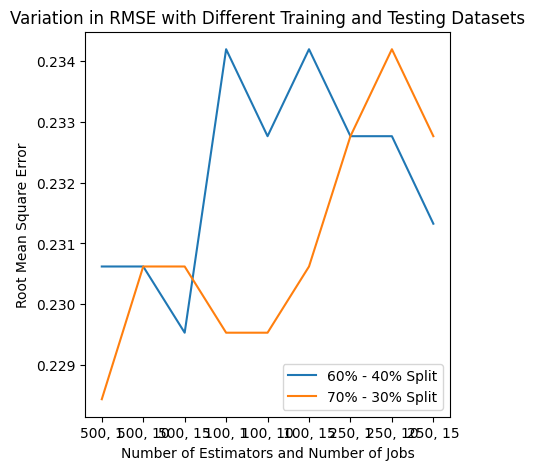

In [ ]:
# Record error values for each split
for n_estimators, n_jobs, accuracy, mse, rmse, mae in results_70:
    if n_jobs == 1:
        mses_70.append(mse)
        rmses_70.append(rmse)
        maes_70.append(mae)
    else:
        mses_60.append(mse)
        rmses_60.append(rmse)
        maes_60.append(mae)


plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 2)
plt.plot(rmses_60, label='60% - 40% Split')
plt.plot(rmses_70, label='70% - 30% Split')
plt.xticks(range(9), [f"{n_estimators}, {n_jobs}" for n_estimators, n_jobs, _, _, _, _ in results_70])
plt.xlabel('Number of Estimators and Number of Jobs')
plt.ylabel('Root Mean Square Error')
plt.title('Variation in RMSE with Different Training and Testing Datasets')
plt.legend()